# Car Price Prediction

In this session we will be using the used car data set to explore the various features, do some feature enginering, tune some parameters, create a ML model and store it to use whenever required

The columns in the given dataset are as follows:

Car_Name - Name of the car

Year - Year of Purchase

Selling_Price - Selling Price of the used car in lac

Present_Price - Selling Price of the new car in lac

Kms_driven - Total kilometers driven

Fuel - Type of fuels required

Seller_Type -  Type of the Seller

Transmission - Type of transmission

Owner - Number of owners the car had

## Importing the libraries

In [57]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt

## Read the data

In [58]:
data = pd.read_csv('../data/car data.csv')

In [59]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Basic Information

In [60]:
# Check for any anamolies in data
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [61]:
data.shape

(301, 9)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [63]:
# Descriptive stas for numeric data type
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [64]:
# Descriptive stas for categorical data type
data.describe(exclude = np.number)

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [65]:
# Check for null values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Observations:
1. Year is an int. But its true nature is categorical
2. 32K for a car (800) and 10K for bike (pulsar) prices look very cheap.
3. Owners seem to have a few outliers and it has low variance

# EDA

In [66]:
data.groupby('Car_Name')['Selling_Price'].agg(np.min).sort_values(ascending = False)

Car_Name
land cruiser                 35.00
elantra                      11.45
creta                        11.25
vitara brezza                 9.25
fortuner                      9.25
ciaz                          6.75
s cross                       6.50
baleno                        5.85
ertiga                        5.80
ignis                         4.90
etios gd                      4.75
etios cross                   4.50
verna                         4.50
xcent                         4.40
etios g                       3.95
grand i10                     3.90
amaze                         3.65
corolla altis                 3.60
brio                          3.00
swift                         3.00
i20                           2.90
alto 800                      2.85
innova                        2.75
etios liva                    2.65
i10                           2.55
camry                         2.50
ritz                          2.35
dzire                         2.25
jazz       

## Univariate - Numeric

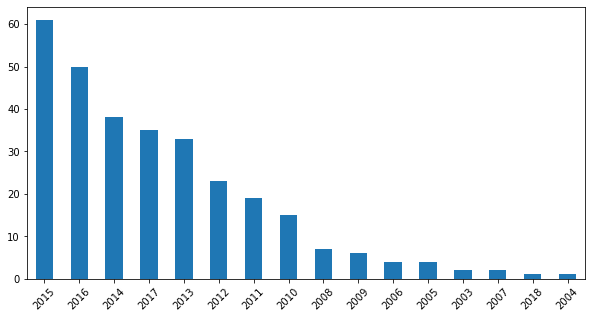

In [67]:
data['Year'].value_counts().plot(kind = 'bar',figsize = (10,5),rot =45)
plt.show()

## Plot the Target variable

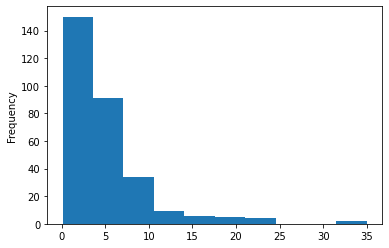

In [68]:
data['Selling_Price'].plot(kind = 'hist')
plt.show()

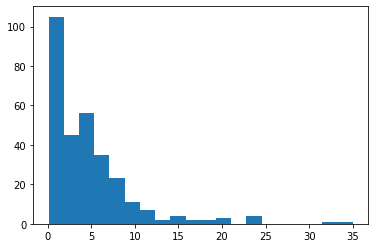

In [69]:
plt.hist(data['Selling_Price'],bins = 20)
plt.show()

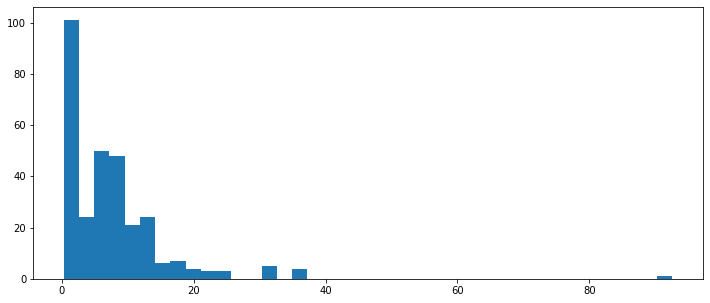

In [70]:
# Distribution of new price

plt.figure(figsize=(12, 5))
plt.hist(data['Present_Price'],bins = 40)
plt.show()

In [71]:
# categories a car wrt price
def car_segment(price):
    if price <= 5:
        return 'economical'
    if price <= 10:
        return 'normal'
    if price <=20:
        return 'high end'
    elif price >20:
        return 'premium'

In [72]:
data['Car_Segment'] = data['Present_Price'].map(car_segment)

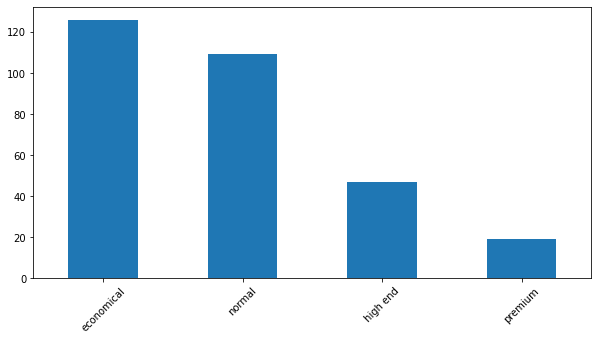

In [73]:
data['Car_Segment'].value_counts().plot(kind = 'bar',figsize = (10,5),rot =45)
plt.show()

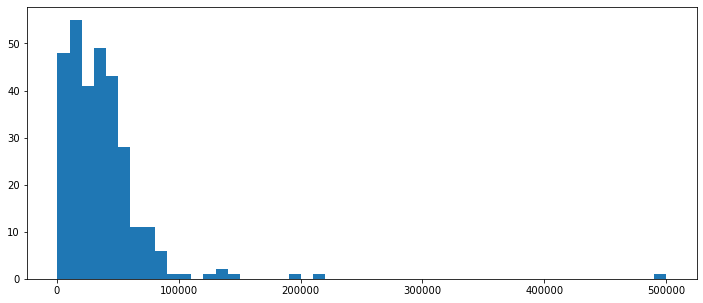

In [74]:
# Distribution of kms driven

plt.figure(figsize=(12, 5))
plt.hist(data['Kms_Driven'],bins = 50)
plt.show()

In [75]:
# Create segment for kms driven

def driven_segment(kms):
    if kms < 10000:
        return 'below_10k'
    elif kms < 30000:
        return 'below_30k'
    elif kms < 50000:
        return 'below_50k'
    elif kms <100000:
        return 'below_100k'
    elif kms > 100000:
        return 'above_100k'

In [76]:
data['Driven_Segment'] = data['Kms_Driven'].map(driven_segment)

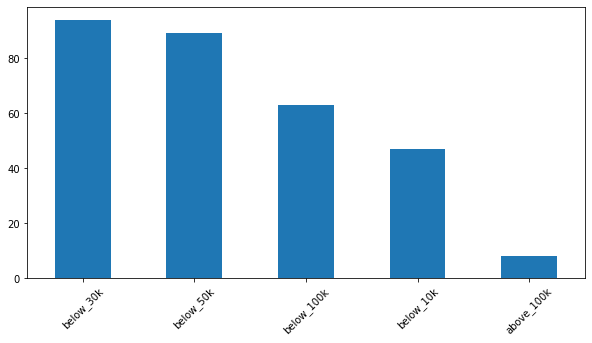

In [77]:
data['Driven_Segment'].value_counts().plot(kind = 'bar',figsize = (10,5),rot =45)
plt.show()

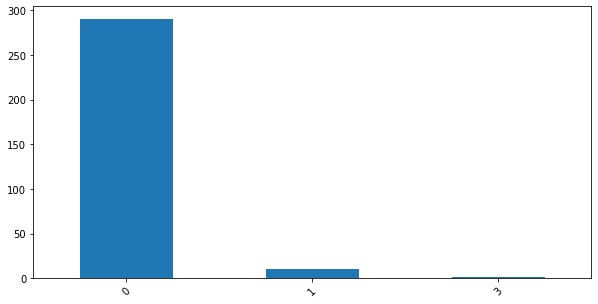

In [78]:
data['Owner'].value_counts().plot(kind = 'bar',figsize = (10,5),rot =45)
plt.show()

In [79]:
# % of car with single owner
data['Owner'].value_counts(normalize = True)*100

0    96.345515
1     3.322259
3     0.332226
Name: Owner, dtype: float64

## EDA Univariate -  Catagorical

In [80]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

## Plot the top 10 cars sold

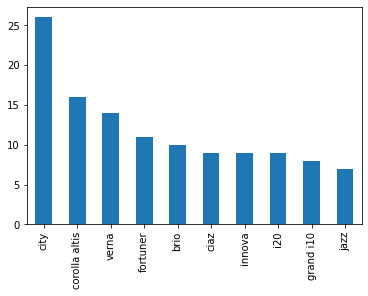

In [81]:
data['Car_Name'].value_counts(ascending = False).nlargest(10).plot(kind = 'bar')
plt.show()

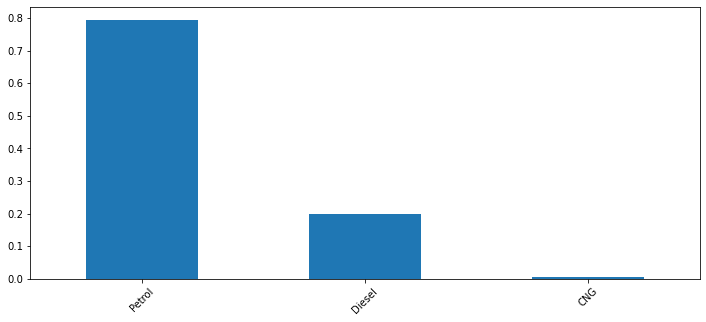

In [82]:
# Value counts for fuel type

data['Fuel_Type'].value_counts(normalize=True).plot(kind='bar', figsize=(12, 5), rot=45)
plt.show()

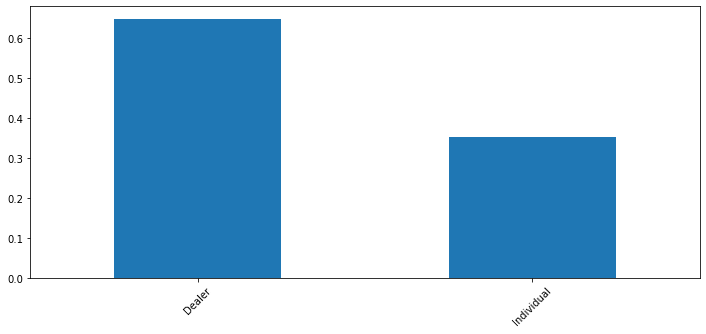

In [83]:
# Value counts for fuel type

data['Seller_Type'].value_counts(normalize=True).plot(kind='bar', figsize=(12, 5), rot=45)
plt.show()

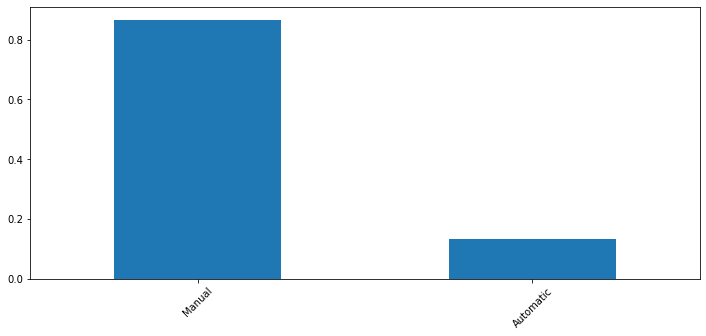

In [84]:
# Value counts for fuel type

data['Transmission'].value_counts(normalize=True).plot(kind='bar', figsize=(12, 5), rot=45)
plt.show()

In [85]:
bikes_identifier = [
    'Royal Enfield', 'Bajaj', 'Honda CB', 'Hero', 'Yamaha', 'Activa', 'TVS', 'KTM',
    'Hyosung', 'Honda Karizma', 'Access 125', 'Mahindra Mojo', 'Honda Dream Yuga','UM Renegade Mojave'
]

def vehicle_type(name):
    if any(i in name for i in bikes_identifier):
        return "two_whl"
    
    return "four_whl"

In [86]:
data['Vehicle_Type'] = data['Car_Name'].map(vehicle_type)

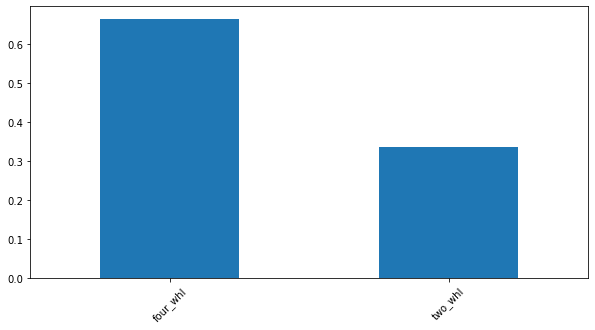

In [87]:
data['Vehicle_Type'].value_counts(normalize = True).plot(kind = 'bar',figsize = (10,5),rot =45)
plt.show()

In [88]:
data[data['Vehicle_Type'] == 'four_whl']['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'i20', 'grand i10', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

### Observations:
1. Bikes included - Royal Enfield, Bajaj, Honda CB, Hero, Yamaha, Activa, TVS, KTM, Hyosung, Honda Karizma, Access 125, Mahindra Mojo
2. 80% vehicles are on petrol

## bivariate analysis

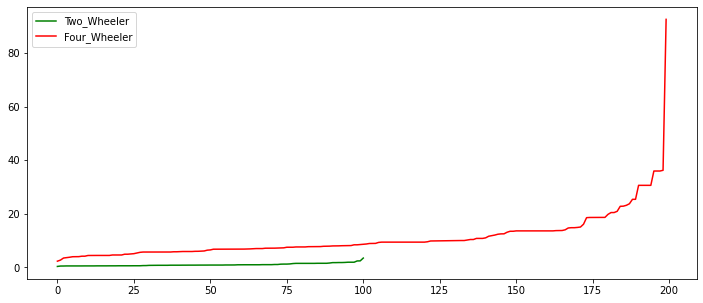

In [89]:
# New purcahse price of bikes and cars seperatedly

plt.figure(figsize=(12, 5))
plt.plot(np.sort(data[data['Vehicle_Type'] == 'two_whl']['Present_Price']),color = 'green', label = 'Two_Wheeler')
plt.plot(np.sort(data[data['Vehicle_Type'] == 'four_whl']['Present_Price']),color = 'red', label = 'Four_Wheeler')
plt.legend()
plt.show()

In [90]:
# Min and max cars and bike
data.pivot_table(index = 'Vehicle_Type', values = 'Present_Price', aggfunc = ['min','max'])

,min,max
,Present_Price,Present_Price
Vehicle_Type,,
four_whl,2.28,92.60
two_whl,0.32,3.45


In [91]:
data[data['Vehicle_Type'] == 'four_whl'].pivot_table(index = 'Vehicle_Type', values = 'Present_Price', aggfunc = ['min','max','mean'], columns = 'Car_Segment')

min                                max                               mean                                
Car_Segment  economical high end normal premium economical high end normal premium economical   high end    normal    premium
Vehicle_Type                                                                                                                 
four_whl           2.28    10.21   5.09   20.45       4.99    19.77   10.0    92.6     4.1824  14.029362  7.682294  31.307368

In [92]:
# looking for 4 wheeler under 1 lac
data[(data['Vehicle_Type'] == 'four_whl')&(data['Present_Price'] < 3)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Segment,Driven_Segment,Vehicle_Type
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,economical,above_100k,four_whl
44,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,economical,below_100k,four_whl


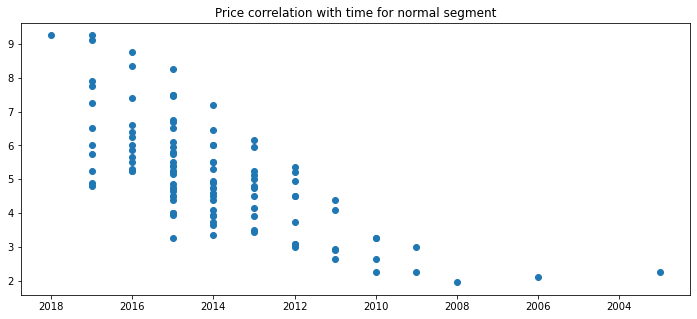

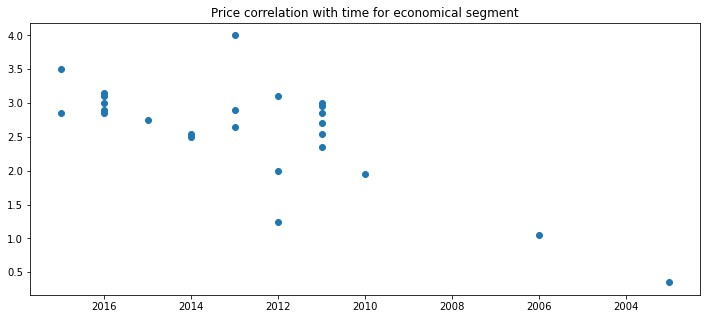

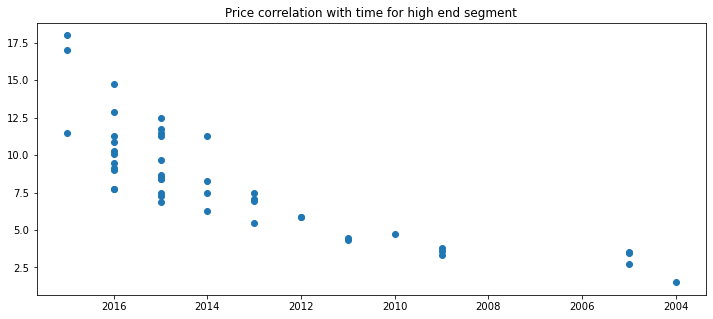

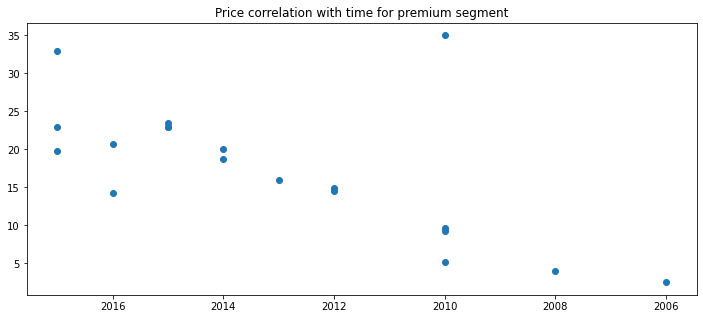

In [93]:
# Corr between Sale price and year
# Correlation between sale price and year

cars = data[data['Vehicle_Type'] == "four_whl"]

for seg in data['Car_Segment'].unique():
    plt.figure(figsize=(12, 5))
    plt.scatter(cars[cars['Car_Segment'] == seg]['Year'], cars[cars['Car_Segment'] == seg]['Selling_Price'])
    ax = plt.gca()
    ax.invert_xaxis()
    plt.title(f'Price correlation with time for {seg} segment')
    plt.show()


## Create a pair plot of the entire data

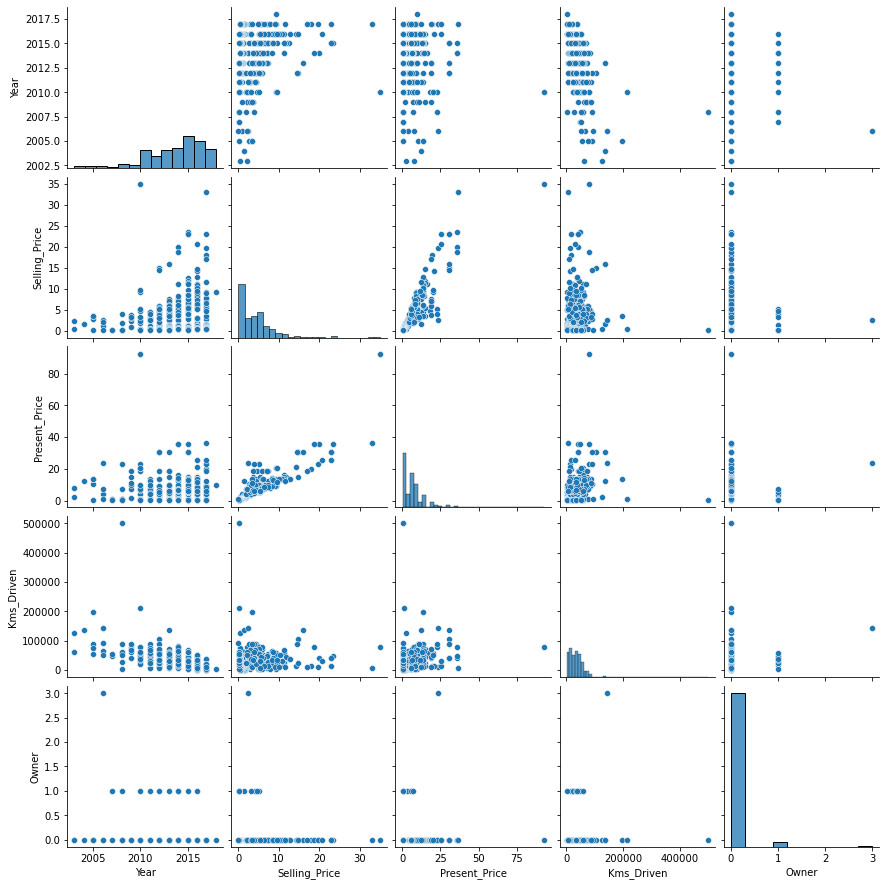

In [94]:
sns.pairplot(data)
plt.show()

* Present price and Selling price has a strong relationship

## Verify our observations finding the correlation with the data

In [95]:
corr = data.corr()
corr

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


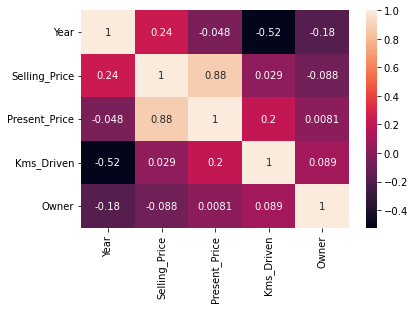

In [96]:
sns.heatmap(corr, annot = True)
plt.show()

## Create a pivot table to find the number of cars sold every year for the top 10 selling cars

In [97]:
top10 = data['Car_Name'].value_counts()[:10].index.to_list()

In [98]:
data[data['Car_Name'].isin (top10)].pivot_table(index = 'Car_Name', columns = 'Year', values = 'Selling_Price', aggfunc = 'count')

Year,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Car_Name,,,,,,,,,,,,
brio,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,4.0,2.0,1.0
ciaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1.0,2.0
city,NaN,1.0,NaN,2.0,1.0,1.0,NaN,2.0,3.0,8.0,7.0,1.0
corolla altis,NaN,NaN,1.0,2.0,2.0,2.0,2.0,4.0,NaN,NaN,2.0,1.0
fortuner,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,2.0,3.0,NaN,1.0
grand i10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,1.0,1.0
i20,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,NaN,2.0,1.0
innova,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0
jazz,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0


## Create a new feature which tells us how old the car is in terms of years

In [99]:
data['no_of_years'] = 2021 - data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Segment,Driven_Segment,Vehicle_Type,no_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,normal,below_30k,four_whl,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,normal,below_50k,four_whl,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,normal,below_10k,four_whl,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,economical,below_10k,four_whl,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,normal,below_50k,four_whl,7


In [100]:
data.drop(['Year'],axis =1, inplace = True)

In [101]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Segment,Driven_Segment,Vehicle_Type,no_of_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,normal,below_30k,four_whl,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,normal,below_50k,four_whl,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,normal,below_10k,four_whl,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,economical,below_10k,four_whl,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,normal,below_50k,four_whl,7


## Segregate the 'Car_Name' column into two parts keeping only the top 10 cars and the rest as others

In [102]:
data['Car_Name'] = [x if x in top10 else 'other' for x in data['Car_Name']]

In [103]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Segment,Driven_Segment,Vehicle_Type,no_of_years
0,other,3.35,5.59,27000,Petrol,Dealer,Manual,0,normal,below_30k,four_whl,7
1,other,4.75,9.54,43000,Diesel,Dealer,Manual,0,normal,below_50k,four_whl,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,normal,below_10k,four_whl,4
3,other,2.85,4.15,5200,Petrol,Dealer,Manual,0,economical,below_10k,four_whl,10
4,other,4.60,6.87,42450,Diesel,Dealer,Manual,0,normal,below_50k,four_whl,7


## One Hot Encode the categorical columns

In [104]:
data = data.drop(['Car_Segment', 'Driven_Segment', 'Owner'], axis=1)

In [105]:
final_df = pd.get_dummies(data,columns = ['Car_Name','Fuel_Type','Seller_Type','Transmission','Vehicle_Type'],drop_first = True)

In [106]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,no_of_years,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_jazz,Car_Name_other,Car_Name_verna,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Vehicle_Type_two_whl
0,3.35,5.59,27000,7,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,4.75,9.54,43000,8,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,7.25,9.85,6900,4,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,2.85,4.15,5200,10,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,4.60,6.87,42450,7,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [107]:
final_df.rename(columns={'Car_Name_corolla altis':'Car_Name_corolla_altis','Car_Name_grand i10':'Car_Name_grand_i10'},inplace = True)

## Split the data into train and test parts

In [108]:
from sklearn.model_selection import train_test_split

# Separating the data into Dependent and Independent features
X = final_df.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']

# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

## Fit a base model using Linear regression

In [109]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score

# Initializing the Linear regression model
lr = LinearRegression()
# Fitting the data
lr.fit(X_train,y_train)
# Getting the predictions on the test data
y_pred = lr.predict(X_test)
# Finding the RMSE
rmse_lr = mean_squared_error(y_test,y_pred) ** 0.5

print(rmse_lr)

1.6739076552156953


## Fit a base Gradient boosting model

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train,y_train)

y_pred_gbr = gbr.predict(X_test)

rmse_gbr = mean_squared_error(y_test,y_pred_gbr) ** 0.5

print(rmse_gbr)

1.125985654201524


## Do a Randomized Search CV on the GBR model, find out the best parameters and the results as well

In [111]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [112]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [113]:
# Initalizing the RandomSearchCV
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid,
                                scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                                verbose=2, random_state=42, n_jobs = 1)

In [114]:
# Fitting the data
gbr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [115]:
gbr_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [116]:
# Getting the predictions
predictions = gbr_random.predict(X_test)

rmse_gbr_2 = mean_squared_error(y_test,predictions) ** 0.5

print(rmse_gbr_2)

1.0263004168541552


## Package your model using pickle and store it

In [117]:
import pickle

# open a file, where you ant to store the data
file = open('gradient_boost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(gbr_random, file)